**Creating the dataset for the model.**

In [33]:
import pandas as pd
import numpy as np

np.random.seed(42)

num_samples = 1000
machine_ids = np.arange(1, num_samples + 1)
temperatures = np.random.randint(60, 100, size=num_samples)
run_times = np.random.randint(1, 300, size=num_samples)
downtime_flags = np.random.choice(['Yes', 'No'], size=num_samples, p=[0.2, 0.8])

synthetic_data = pd.DataFrame({
    'Machine_ID': machine_ids,
    'Temperature': temperatures,
    'Run_Time': run_times,
    'Downtime_Flag': downtime_flags
})

synthetic_data.to_csv('synthetic_manufacturing_data.csv', index=False)

print("Synthetic dataset created and saved as 'synthetic_manufacturing_data.csv'.")

Synthetic dataset created and saved as 'synthetic_manufacturing_data.csv'.


**Collecting and Preprocessing the Data**

In [34]:
import pandas as pd

data = pd.read_csv('synthetic_manufacturing_data.csv')

null_values = data.isnull().sum()
print("Null Values:\n", null_values)

data.dropna(inplace=True)

Null Values:
 Machine_ID       0
Temperature      0
Run_Time         0
Downtime_Flag    0
dtype: int64


**Exploring and Analyzing the Data**

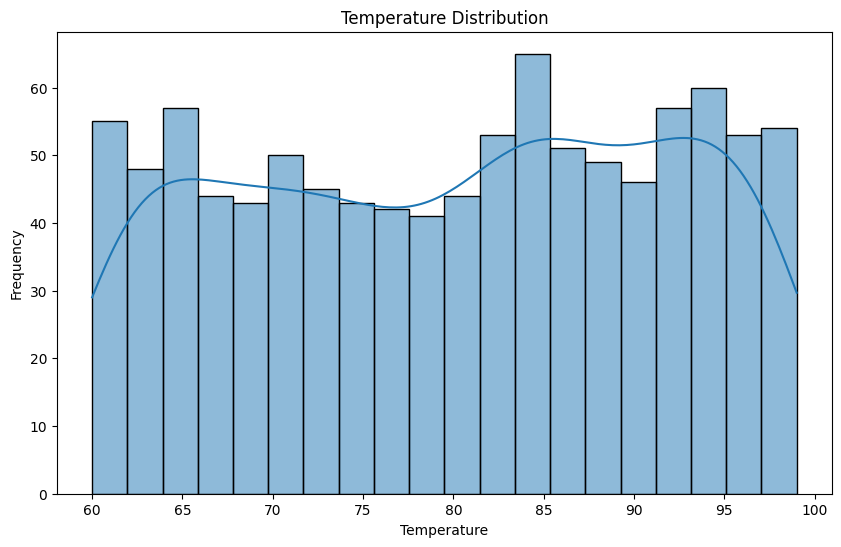

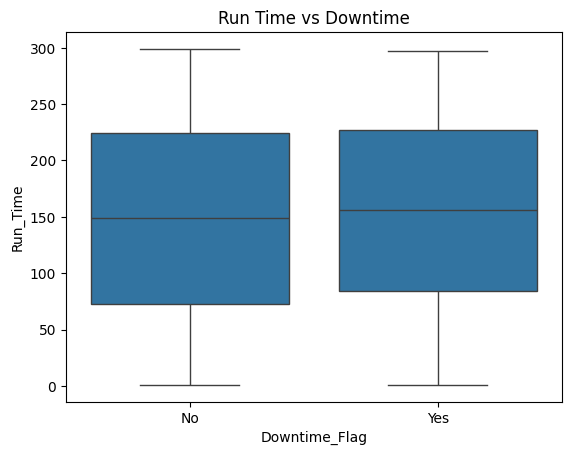

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['Temperature'], bins=20, kde=True)
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

sns.boxplot(x='Downtime_Flag', y='Run_Time', data=data)
plt.title('Run Time vs Downtime')
plt.show()

**Select Appropriate Features**

Converting categorical variables to numerical

Selecting features for the model.


In [36]:
data['Downtime_Flag'] = data['Downtime_Flag'].map({'Yes': 1, 'No': 0})

X = data[['Temperature', 'Run_Time']]
y = data['Downtime_Flag']

**Model Trainning and Performance**

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [39]:
from sklearn.metrics import accuracy_score, classification_report

y_val_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {accuracy:.2f}")

print(classification_report(y_val, y_val_pred))

Validation Accuracy: 0.62
              precision    recall  f1-score   support

           0       0.76      0.75      0.75       116
           1       0.17      0.18      0.17        34

    accuracy                           0.62       150
   macro avg       0.46      0.46      0.46       150
weighted avg       0.62      0.62      0.62       150



**Optimizing and Fine-tuning the Model**

Using Grid Search or Random Search for hyperparameter tuning.

In [40]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 5, 'min_samples_split': 10}


**Test on Unseen Data**

In [41]:
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")

Test Accuracy: 0.75


**Further optimizing the model**

In [42]:
from sklearn.feature_selection import RFE

selector = RFE(DecisionTreeClassifier(random_state=42), n_features_to_select=1)
selector = selector.fit(X_train, y_train)

# Get the ranking of features
ranking = selector.ranking_
print("Feature Ranking:", ranking)

Feature Ranking: [2 1]


In [43]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_val_pred_rf = rf_model.predict(X_val)
rf_accuracy = accuracy_score(y_val, y_val_pred_rf)
print(f"Random Forest Validation Accuracy: {rf_accuracy:.2f}")

Random Forest Validation Accuracy: 0.66


In [44]:
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)

best_rf_model = grid_search_rf.best_estimator_
print("Best Random Forest Parameters:", grid_search_rf.best_params_)

Best Random Forest Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}


In [45]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_rf_model, X_scaled, y, cv=5)
print(f"Cross-Validation Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

Cross-Validation Accuracy: 0.78 ± 0.01


**Final Accuracy**

In [46]:
y_test_pred_rf = best_rf_model.predict(X_test)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
print(f"Test Accuracy: {test_accuracy_rf:.2f}")

Test Accuracy: 0.78


**Saving the model to test api**

In [61]:
import pickle

with open('machine_downtime_model.pkl', 'wb') as file:
    pickle.dump(best_rf_model, file)

print("Model saved as machine_downtime_model.pkl")


Model saved as machine_downtime_model.pkl
